In [1]:
'''
Creating to run Model D Conv1d_mfcc40
different layer system
mfcc 13 avg features
Prediction emotion
Created on 2020.12.11 at 1038

'''
# libraries
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.layers import Conv1D, Conv2D, LSTM
from tensorflow.keras.layers import AveragePooling1D, GlobalAveragePooling2D, MaxPooling1D
from tensorflow.keras.models import Model, model_from_json, Sequential

# added this to plot
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



In [2]:
# load datasets

# assigning the pickle files
with open('./Data_Array_Storage/X_train_mfccavg_axis0_emo.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('./Data_Array_Storage/X_test_mfccavg_axis0_emo.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('./Data_Array_Storage/y_train_mfccavg_axis0_emo.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('./Data_Array_Storage/y_test_mfccavg_axis0_emo.pkl', 'rb') as f:
    y_test = pickle.load(f)
    
print('dataset loaded')

dataset loaded


In [3]:
# input shape
input_shape = (X_train.shape[1], X_train.shape[2])
print(input_shape)

(216, 1)


In [20]:
def model_d_conv1d(input_shape):
    model = Sequential()
    model.add(Conv1D(32, 3, padding='same',input_shape=input_shape))  # X_train.shape[1] = No. of Columns (216)
    model.add(Activation('relu'))
    model.add(Conv1D(32, 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3))) # added drop out and maxpooling layer on 20201209 at 1330
    model.add(Activation('relu'))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(256, 3, padding='same'))
    model.add(Activation('relu'))
#     model.add(LSTM(64))
    model.add(Flatten())
    model.add(Dense(7)) # Target class number
    model.add(Activation('softmax'))
    
    # model optimizer
#     model = model_d_conv1d(input_shape)
    optimizer = tf.keras.optimizers.RMSprop(lr=0.000001, decay=1e-6)
    
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

    return model

In [4]:
def model_d_conv1d_flip(input_shape):
    model = Sequential()
    model.add(Conv1D(256, 3, padding='same',input_shape=input_shape))  # X_train.shape[1] = No. of Columns (216)
    model.add(Activation('relu'))
    model.add(Conv1D(256, 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3))) # added drop out and maxpooling layer on 20201209 at 1330
    model.add(Activation('relu'))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(32, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(7)) # Target class number
    model.add(Activation('softmax'))
    
    # model optimizer
#     model = model_d_conv1d(input_shape)
    optimizer = tf.keras.optimizers.RMSprop(lr=0.000001, decay=1e-6)
    
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

    return model

In [21]:
# load model and input shape
# from models import model_d_conv1d

# model = model_d_conv1d_flip(input_shape)
model = model_d_conv1d(input_shape)
# optimizer = tf.keras.optimizers.RMSprop(lr=0.000001, decay=1e-6)

print('input shape, model, optimizer loaded')

model.summary()

input shape, model, optimizer loaded
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 216, 32)           128       
_________________________________________________________________
activation_20 (Activation)   (None, 216, 32)           0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 216, 32)           3104      
_________________________________________________________________
batch_normalization_4 (Batch (None, 216, 32)           128       
_________________________________________________________________
activation_21 (Activation)   (None, 216, 32)           0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 216, 32)           0         
_________________________________________________________________
max_pooling1d_6 (

In [22]:
# callback list: ModelCheckpoint, reduceLROnPlat, EarlyStopping
# checkpoint_path = "./models_saved/model_d_conv1d_v3.h5"

checkpoint_path = "./models_saved/model_d_conv1d_mfccavg_emo.h5"

# Create a callback that saves the model's weights
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=False,
                                                 save_best_only=True,
                                                 verbose=1), # 1 tells your which epoch is saving
#                                                  monitor='val_categorical_accuracy',  # added for emo1d
#                                                  mode='max'), # added for emo1d
               tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', # changed from 'val_accuracy', 'val_loss'
                                                patience=5, 
                                                restore_best_weights=True),
#                                                 verbose = 1, # added verbose for emo1d
#                                                 mode = 'min'), # added for emo1d
               tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                    patience=2, 
                                                    factor=0.5, 
                                                    min_lr=0.000001, 
                                                    verbose=1)]

print('callbacks and checkpoints set')

callbacks and checkpoints set


In [39]:
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizer,
#               metrics=['accuracy'])

# print('model compiled')

model compiled


In [23]:
batch_size = 64

model_history=model.fit(X_train, 
                        y_train,
                        batch_size=batch_size,
                        epochs=150,
                        validation_data=(X_test, y_test),
                        verbose=2,
                        callbacks=callbacks)

Epoch 1/150

Epoch 00001: val_loss improved from inf to 1.93321, saving model to ./models_saved/model_d_conv1d_mfccavg_emo.h5
305/305 - 14s - loss: 1.9602 - accuracy: 0.1611 - val_loss: 1.9332 - val_accuracy: 0.1673
Epoch 2/150

Epoch 00002: val_loss improved from 1.93321 to 1.91872, saving model to ./models_saved/model_d_conv1d_mfccavg_emo.h5
305/305 - 14s - loss: 1.9271 - accuracy: 0.1840 - val_loss: 1.9187 - val_accuracy: 0.1739
Epoch 3/150

Epoch 00003: val_loss improved from 1.91872 to 1.90730, saving model to ./models_saved/model_d_conv1d_mfccavg_emo.h5
305/305 - 13s - loss: 1.9073 - accuracy: 0.2011 - val_loss: 1.9073 - val_accuracy: 0.1926
Epoch 4/150

Epoch 00004: val_loss improved from 1.90730 to 1.89837, saving model to ./models_saved/model_d_conv1d_mfccavg_emo.h5
305/305 - 14s - loss: 1.8917 - accuracy: 0.2149 - val_loss: 1.8984 - val_accuracy: 0.2132
Epoch 5/150

Epoch 00005: val_loss improved from 1.89837 to 1.88987, saving model to ./models_saved/model_d_conv1d_mfccavg_e

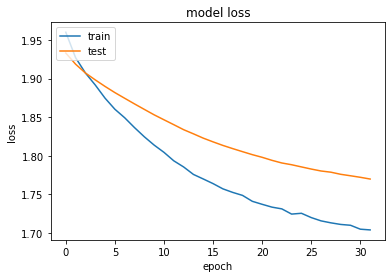

In [24]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
score,acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

77/77 - 0s - loss: 1.7801 - accuracy: 0.3180
score: 1.78
acc: 0.32


In [26]:
# load labels
with open('./Data_Array_Storage/labels_mfccavg_axis0_emo.pkl', 'rb') as f:
    lb = pickle.load(f)

In [27]:
# error analysis

preds = model.predict(X_test, 
                         batch_size=batch_size, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

77/77 [==============================] - 0s 3ms/step


array([5, 1, 1, ..., 3, 3, 5])

In [28]:
# predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[150:180]

,actualvalues,predictedvalues
150,fear,neutral
151,fear,disgust
152,surprise,neutral
153,fear,sad
154,disgust,angry
155,angry,fear
156,fear,happy
157,fear,disgust
158,neutral,happy
159,happy,fear


In [17]:
# the confusion matrix heat map plot
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

0.31798561151079136


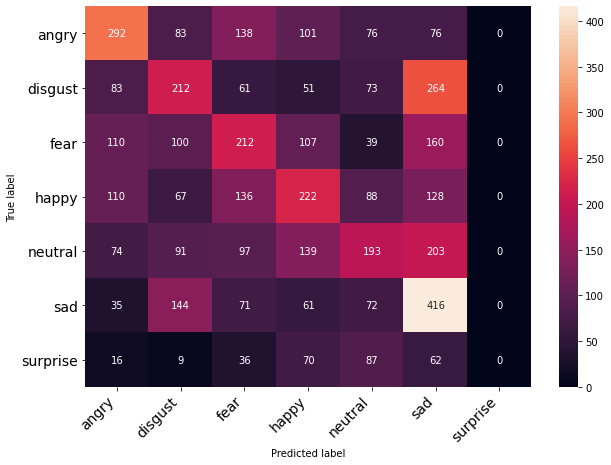

In [29]:
# Get the predictions file 
# finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [30]:
# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.41      0.38      0.39       766
     disgust       0.30      0.28      0.29       744
        fear       0.28      0.29      0.29       728
       happy       0.30      0.30      0.30       751
     neutral       0.31      0.24      0.27       797
         sad       0.32      0.52      0.39       799
    surprise       0.00      0.00      0.00       280

    accuracy                           0.32      4865
   macro avg       0.27      0.29      0.28      4865
weighted avg       0.30      0.32      0.30      4865



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
